## UCI Heart Disease Dataset: 

#### To 

In [2]:
conda install -c anaconda pandas-profiling

Solving environment: done

## Package Plan ##

  environment location: /Users/vednerlikar/anaconda3

  added / updated specs:
    - pandas-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         132 KB  anaconda
    certifi-2020.6.20          |           py37_0         159 KB  anaconda
    conda-4.8.3                |           py37_0         3.0 MB  anaconda
    openssl-1.1.1g             |       h1de35cc_0         3.4 MB  anaconda
    pandas-profiling-1.4.1     |           py37_0          39 KB  anaconda
    ------------------------------------------------------------
                                           Total:         6.8 MB

The following NEW packages will be INSTALLED:

  pandas-profiling   anaconda/osx-64::pandas-profiling-1.4.1-py37_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas_profiling as pp

In [5]:
df = pd.read_csv('/Users/vednerlikar/Downloads/heart-disease.csv')

In [6]:
pp.ProfileReport(df)

Number of variables,14
Number of observations,303
Total Missing (%),0.0%
Total size in memory,33.2 KiB
Average record size in memory,112.3 B
Numeric,10
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


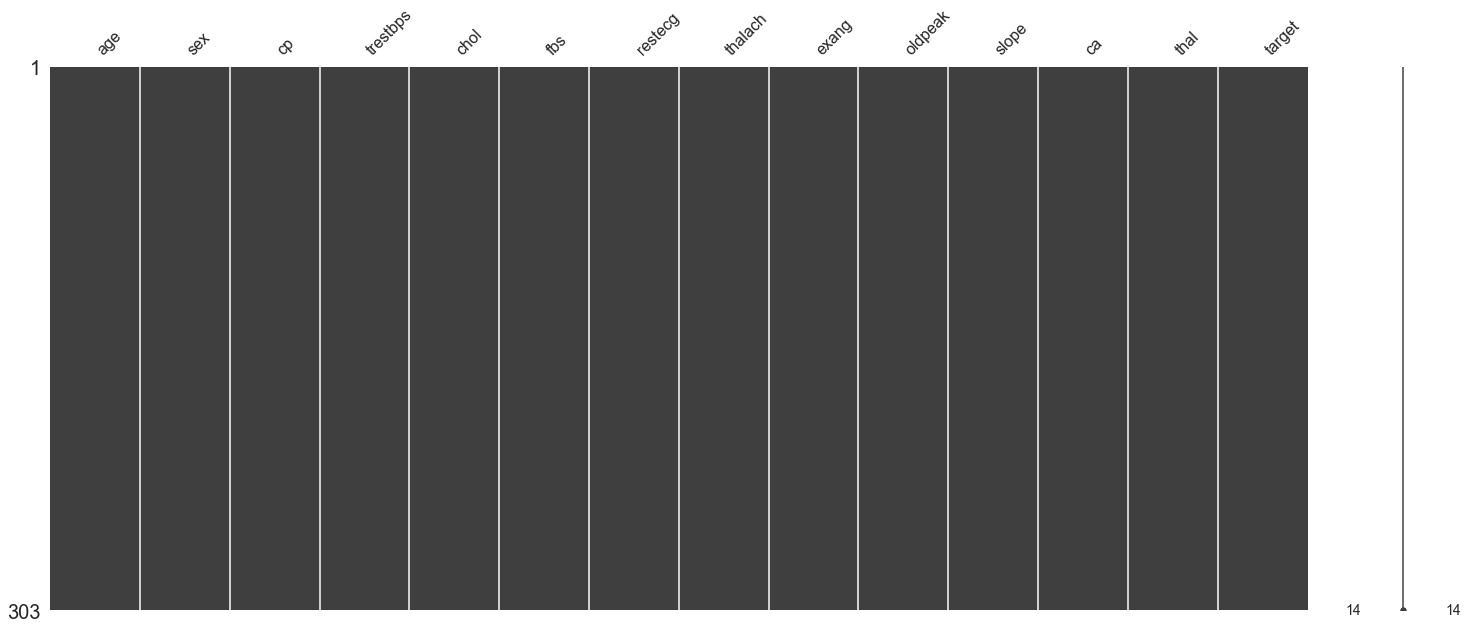

In [45]:
msno.matrix(df)
#no missing values

1    165
0    138
Name: target, dtype: int64

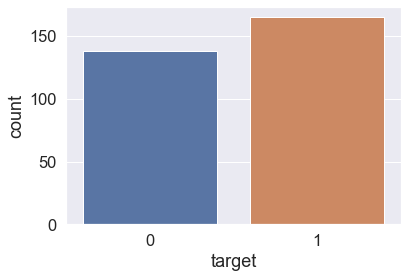

In [46]:
sns.countplot(df.target)
df.target.value_counts()

In [47]:
#Renaming the columns for better understanding
df.rename (columns = {
    'cp':'chest_pain',
    'trestbps':'blood_pressure',
    'chol':'cholesterol',
    'fbs':'blood_sugar',
    'restecg':'rest_ecg',
    'thalach':'heart_rate',
    'exang':'exercise_angina',
    'oldpeak':'st_peak',
    'slope':'st_slope',
    'ca':'n_vessels',
    'thal':'thallium',
    'target':'heart_disease'}, inplace = True)

In [48]:
df.sex.replace({
    0: 'woman',
    1: 'man'}, inplace=True)
df.chest_pain.replace({
    1: 'typical',
    2: 'atypical',
    3: 'non-anginal',
    0: 'none'}, inplace=True)
df.blood_sugar.replace({
    0: 'normal',
    1: 'high'}, inplace=True)
df.rest_ecg.replace({
    1: 'normal',
    2: 'wave-abnormal',
    0: 'lv-hyperthrophy'}, inplace=True)
df.exercise_angina.replace({
    0: 'no',
    1: 'yes'}, inplace=True)
df.st_slope.replace({
    2: 'increasing',
    1: 'flat',
    0: 'decreasing'}, inplace=True)
df.thallium.replace({
    0: float('nan'), # 0 is not a valid value
    2: 'normal',
    1: 'fixed',
    3: 'reversable'}, inplace=True)
df.heart_disease.replace({
    0: 'yes',
    1: 'no'}, inplace=True)

In [49]:
df.mode()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,exercise_angina,st_peak,st_slope,n_vessels,thallium,heart_disease
0,58.0,man,none,120.0,197,normal,normal,162.0,no,0.0,increasing,0.0,normal,no
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.mode().iloc[0]

age                        58
sex                       man
chest_pain               none
blood_pressure            120
cholesterol               197
blood_sugar            normal
rest_ecg               normal
heart_rate                162
exercise_angina            no
st_peak                     0
st_slope           increasing
n_vessels                   0
thallium               normal
heart_disease              no
Name: 0, dtype: object

In [51]:
df.fillna(df.mode().iloc[0], inplace=True)

In [52]:
categoricals = ['sex', 'chest_pain', 'blood_sugar', 'rest_ecg', 'exercise_angina',
                'st_slope', 'thallium', 'heart_disease', 'n_vessels']
numericals = ['age', 'blood_pressure', 'cholesterol', 'heart_rate', 'st_peak']

In [53]:
for col in categoricals:
    df[col] = df[col].astype('category')


In [54]:
categoricals = [c for c in categoricals if c != 'heart_disease']

In [55]:
col_order = numericals + categoricals + ['heart_disease']

In [56]:
df = df.loc[:, col_order]

In [57]:
label = 'heart_disease'
features = [col for col in df.columns if col != label]

In [58]:
X = df[features]
y = df[label] 

In [59]:
X.columns

Index(['age', 'blood_pressure', 'cholesterol', 'heart_rate', 'st_peak', 'sex',
       'chest_pain', 'blood_sugar', 'rest_ecg', 'exercise_angina', 'st_slope',
       'thallium', 'n_vessels'],
      dtype='object')

In [60]:
y = y.replace({'no': 0, 'yes': 1})

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle = True, test_size = .2, random_state = 0)

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [63]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

In [64]:
transformer = ColumnTransformer(transformers=[
    ('numerical', StandardScaler(), numericals),
    ('categorical', OneHotEncoder(drop='first'), categoricals)
])

In [25]:
tree = make_pipeline(
    transformer,
    GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=0),
        cv=kfold,
        param_grid={
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 10, 20],
            'min_samples_split': [.001, .01, .1],
            'min_samples_leaf': [.001, .01, .1]
        },
        n_jobs=4,
        verbose=1,
        scoring='recall'
    )
)

In [26]:
tree.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:    1.1s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['age', 'blood_pressure',
                                                   'cholesterol', 'heart_rate',
                                                   'st_peak']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'chest_pain',
                                                   'blood_sugar', 'rest_ecg',
                                                   'exercise_angina',
                                                   'st_slope', 'thallium',
                                                   'n_vessels'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                            

In [27]:
tree[-1].best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.001,
                       min_samples_split=0.1, random_state=0)

In [28]:
prediction = tree.predict(X_test)

In [29]:
print("Accuracy score on the test set:", accuracy_score(y_test,prediction))

Accuracy score on the test set: 0.819672131147541


Text(0.5, 1, 'Confusion Matrix')

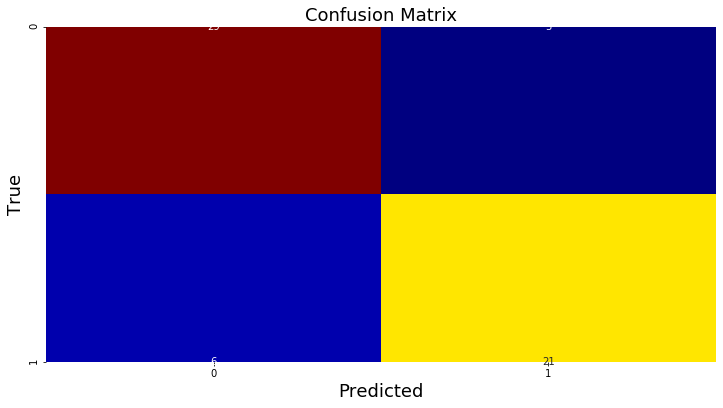

In [30]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test, prediction), cmap=plt.cm.jet,square = True, annot=True, cbar=False, ax=ax)
ax.set_xlabel('Predicted', fontsize=18)
ax.set_ylabel('True', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=18)

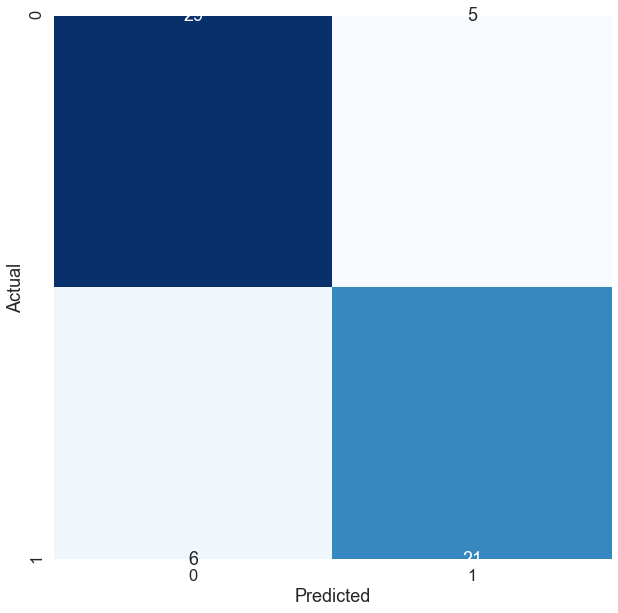

In [31]:
data = confusion_matrix(y_test, prediction)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(prediction))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True, cbar = False)

In [32]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [33]:
import scikitplot as skplt

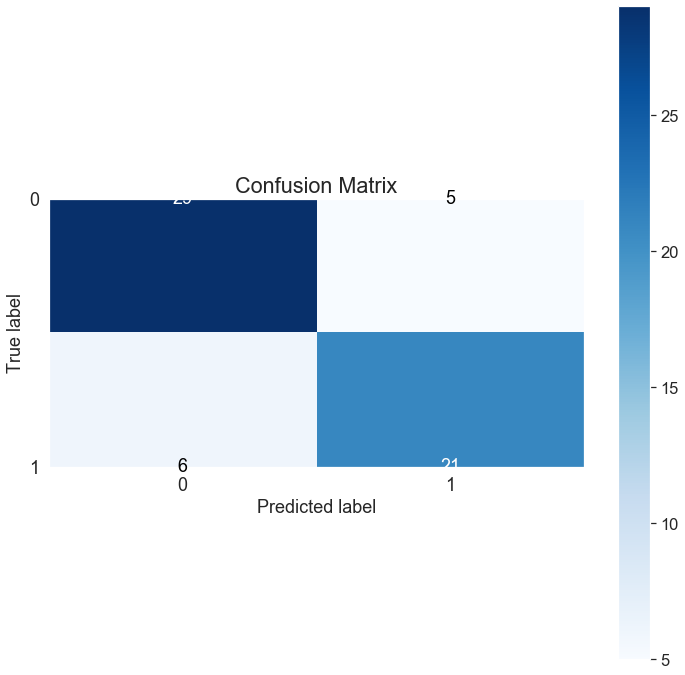

In [34]:
skplt.metrics.plot_confusion_matrix(
    y_test,
    prediction,
    figsize = (12,12)
)

In [35]:
from sklearn.tree import plot_tree

In [36]:
ohe = tree[0].transformers_[1][1]

In [37]:
feature_names = numericals + list(ohe.get_feature_names(input_features = categoricals))

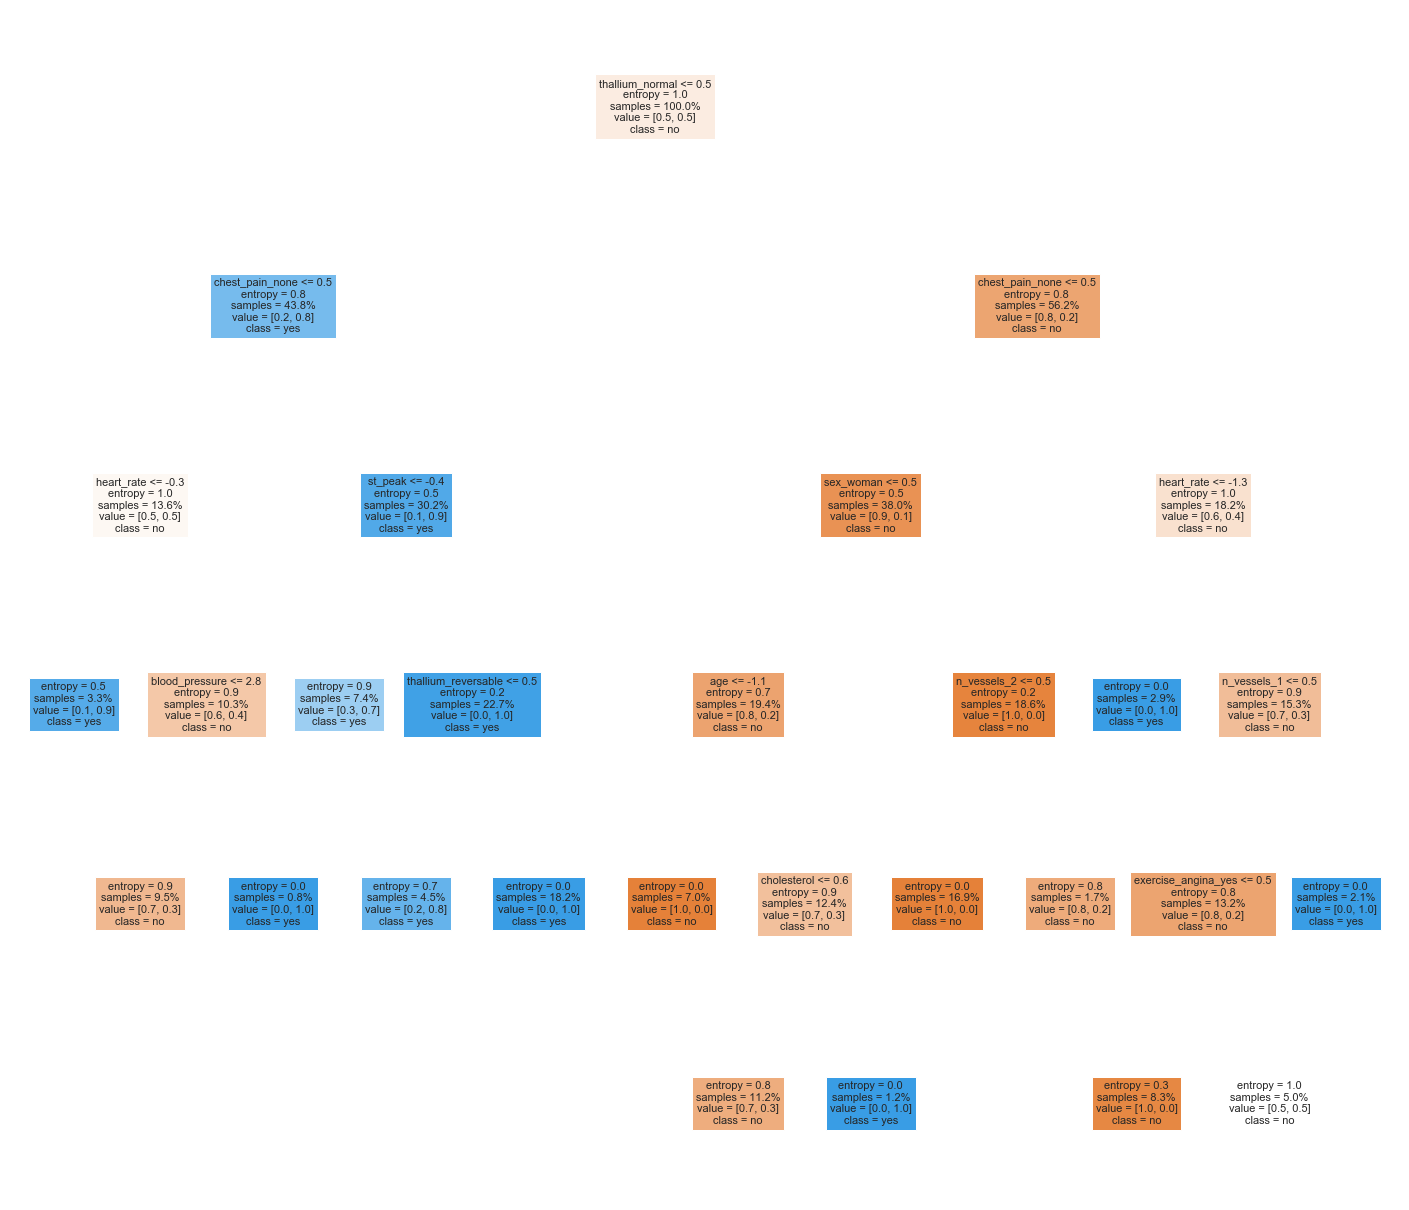

In [38]:
fig, ax = plt.subplots(figsize=(25,22))
plot_tree(tree[-1].best_estimator_, max_depth=5, feature_names=feature_names, class_names=['no', 'yes'], label='all', filled=True, rounded=False, proportion=True, precision=1, fontsize=11, ax=ax);

In [39]:
feature_importance = tree[-1].best_estimator_.feature_importances_

In [40]:
for fi, fn in sorted(zip(feature_importance, feature_names), reverse=True):
    if fi > 0:
        print(f"Feature {fn}: importance = {fi:.3f}")

Feature thallium_normal: importance = 0.361
Feature chest_pain_none: importance = 0.173
Feature heart_rate: importance = 0.100
Feature n_vessels_1: importance = 0.063
Feature age: importance = 0.051
Feature st_peak: importance = 0.050
Feature sex_woman: importance = 0.044
Feature exercise_angina_yes: importance = 0.044
Feature cholesterol: importance = 0.035
Feature thallium_reversable: importance = 0.033
Feature n_vessels_2: importance = 0.025
Feature blood_pressure: importance = 0.021


In [41]:
sum(feature_importance)

1.0000000000000002